In [1]:
from scipy.io import arff
import arff, numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pylab as plt
import scipy
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab

In [2]:
list_data = list(arff.load('/Users/admin/Documents/Documents/JLU/3rd Sem/Project/credit_fruad.arff'))

In [3]:
df = pd.DataFrame(list_data)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,'<0',6.0,'critical/other existing credit',radio/tv,1169.0,'no known savings','>=7',4.0,'male single',none,...,'real estate',67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,'0<=X<200',48.0,'existing paid',radio/tv,5951.0,'<100','1<=X<4',2.0,'female div/dep/mar',none,...,'real estate',22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,'no checking',12.0,'critical/other existing credit',education,2096.0,'<100','4<=X<7',2.0,'male single',none,...,'real estate',49.0,none,own,1.0,'unskilled resident',2.0,none,yes,good
3,'<0',42.0,'existing paid',furniture/equipment,7882.0,'<100','4<=X<7',2.0,'male single',guarantor,...,'life insurance',45.0,none,'for free',1.0,skilled,2.0,none,yes,good
4,'<0',24.0,'delayed previously','new car',4870.0,'<100','1<=X<4',3.0,'male single',none,...,'no known property',53.0,none,'for free',2.0,skilled,2.0,none,yes,bad
5,'no checking',36.0,'existing paid',education,9055.0,'no known savings','1<=X<4',2.0,'male single',none,...,'no known property',35.0,none,'for free',1.0,'unskilled resident',2.0,yes,yes,good
6,'no checking',24.0,'existing paid',furniture/equipment,2835.0,'500<=X<1000','>=7',3.0,'male single',none,...,'life insurance',53.0,none,own,1.0,skilled,1.0,none,yes,good
7,'0<=X<200',36.0,'existing paid','used car',6948.0,'<100','1<=X<4',2.0,'male single',none,...,car,35.0,none,rent,1.0,'high qualif/self emp/mgmt',1.0,yes,yes,good
8,'no checking',12.0,'existing paid',radio/tv,3059.0,'>=1000','4<=X<7',2.0,'male div/sep',none,...,'real estate',61.0,none,own,1.0,'unskilled resident',1.0,none,yes,good
9,'0<=X<200',30.0,'critical/other existing credit','new car',5234.0,'<100',unemployed,4.0,'male mar/wid',none,...,car,28.0,none,own,2.0,'high qualif/self emp/mgmt',1.0,none,yes,bad


In [5]:
#over_draft { '<0', '0<=X<200', '>=200', 'no checking'}
#attribute credit_usage real
#attribute credit_history { 'no credits/all paid', 'all paid', 'existing paid', 'delayed previously', 'critical/other existing credit'}
#attribute purpose { 'new car', 'used car', furniture/equipment, radio/tv, 'domestic appliance', repairs, education, vacation, retraining, business, other}
#attribute current_balance real
#attribute Average_Credit_Balance { '<100', '100<=X<500', '500<=X<1000', '>=1000', 'no known savings'}
#attribute employment { unemployed, '<1', '1<=X<4', '4<=X<7', '>=7'}
#attribute location real
#attribute personal_status { 'male div/sep', 'female div/dep/mar', 'male single', 'male mar/wid', 'female single'}
#attribute other_parties { none, 'co applicant', guarantor}
#attribute residence_since real
#attribute property_magnitude { 'real estate', 'life insurance', car, 'no known property'}
#attribute cc_age real
#attribute other_payment_plans { bank, stores, none}
#attribute housing { rent, own, 'for free'}
#attribute existing_credits real
#attribute job { 'unemp/unskilled non res', 'unskilled resident', skilled, 'high qualif/self emp/mgmt'}
#attribute num_dependents real
#attribute own_telephone { none, yes}
#attribute foreign_worker { yes, no}
#attribute class {'good','bad'}

In [5]:
names = ["over_draft", "credit_usage", "credit_history", "purpose", "current_balance", "Average_Credit_Balance", "employment", "location", "personal_status", "other_parties", "residence_since", "property_magnitude", "cc_age", "other_payment_plans", "housing", "existing_credits", "job", "num_dependents", "own_telephone", "foreign_worker", "class"]

In [6]:
df.shape

(1000, 21)

In [7]:
df.columns = names

In [8]:
df.head(1)

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6.0,'critical/other existing credit',radio/tv,1169.0,'no known savings','>=7',4.0,'male single',none,...,'real estate',67.0,none,own,2.0,skilled,1.0,yes,yes,good


In [9]:
df['class'].value_counts()

good    700
bad     300
Name: class, dtype: int64

In [10]:
df


,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6.0,'critical/other existing credit',radio/tv,1169.0,'no known savings','>=7',4.0,'male single',none,...,'real estate',67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,'0<=X<200',48.0,'existing paid',radio/tv,5951.0,'<100','1<=X<4',2.0,'female div/dep/mar',none,...,'real estate',22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,'no checking',12.0,'critical/other existing credit',education,2096.0,'<100','4<=X<7',2.0,'male single',none,...,'real estate',49.0,none,own,1.0,'unskilled resident',2.0,none,yes,good
3,'<0',42.0,'existing paid',furniture/equipment,7882.0,'<100','4<=X<7',2.0,'male single',guarantor,...,'life insurance',45.0,none,'for free',1.0,skilled,2.0,none,yes,good
4,'<0',24.0,'delayed previously','new car',4870.0,'<100','1<=X<4',3.0,'male single',none,...,'no known property',53.0,none,'for free',2.0,skilled,2.0,none,yes,bad
5,'no checking',36.0,'existing paid',education,9055.0,'no known savings','1<=X<4',2.0,'male single',none,...,'no known property',35.0,none,'for free',1.0,'unskilled resident',2.0,yes,yes,good
6,'no checking',24.0,'existing paid',furniture/equipment,2835.0,'500<=X<1000','>=7',3.0,'male single',none,...,'life insurance',53.0,none,own,1.0,skilled,1.0,none,yes,good
7,'0<=X<200',36.0,'existing paid','used car',6948.0,'<100','1<=X<4',2.0,'male single',none,...,car,35.0,none,rent,1.0,'high qualif/self emp/mgmt',1.0,yes,yes,good
8,'no checking',12.0,'existing paid',radio/tv,3059.0,'>=1000','4<=X<7',2.0,'male div/sep',none,...,'real estate',61.0,none,own,1.0,'unskilled resident',1.0,none,yes,good
9,'0<=X<200',30.0,'critical/other existing credit','new car',5234.0,'<100',unemployed,4.0,'male mar/wid',none,...,car,28.0,none,own,2.0,'high qualif/self emp/mgmt',1.0,none,yes,bad


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
over_draft                1000 non-null object
credit_usage              1000 non-null float64
credit_history            1000 non-null object
purpose                   1000 non-null object
current_balance           1000 non-null float64
Average_Credit_Balance    1000 non-null object
employment                1000 non-null object
location                  1000 non-null float64
personal_status           1000 non-null object
other_parties             1000 non-null object
residence_since           1000 non-null float64
property_magnitude        1000 non-null object
cc_age                    1000 non-null float64
other_payment_plans       1000 non-null object
housing                   1000 non-null object
existing_credits          1000 non-null float64
job                       1000 non-null object
num_dependents            1000 non-null float64
own_telephone             1000 non-null o

## converting categorical data from text to int

In [12]:
df["over_draft"].unique()

array(["'<0'", "'0<=X<200'", "'no checking'", "'>=200'"], dtype=object)

In [13]:
df_num = df

In [14]:
df_num.head(1)

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6.0,'critical/other existing credit',radio/tv,1169.0,'no known savings','>=7',4.0,'male single',none,...,'real estate',67.0,none,own,2.0,skilled,1.0,yes,yes,good


In [15]:
def if_func1 (row):
        od = row['over_draft']
        if od == "'no checking'":
            return 1
        elif od == "'<0'":
            return 2
        elif od == "'0<=X<200'":
            return 3
        else:
            return 4


In [16]:
df_num["over_draft"] = df_num.apply(if_func1, axis = "columns")

In [17]:
df["credit_history"].unique()

array(["'critical/other existing credit'", "'existing paid'",
       "'delayed previously'", "'no credits/all paid'", "'all paid'"], dtype=object)

In [18]:
def if_func2 (row):
        ch = row['credit_history']
        if ch == "'no credits/all paid'":
            return 1
        elif ch == "'all paid'":
            return 2
        elif ch == "'existing paid'":
            return 3
        elif ch == "'delayed previously'":
            return 4
        else:
            return 5


In [19]:
df_num["credit_history"] = df_num.apply(if_func2, axis = "columns")

In [20]:
df["purpose"].unique()

array(['radio/tv', 'education', 'furniture/equipment', "'new car'",
       "'used car'", 'business', "'domestic appliance'", 'repairs',
       'other', 'retraining'], dtype=object)

In [21]:
def if_func3 (row):
        pr = row['purpose']
        if pr == "radio/tv":
            return 1
        elif pr == "education":
            return 2
        elif pr == "furniture/equipment":
            return 3
        elif pr == "'new car'":
            return 4
        elif pr == "'used car'":
            return 5
        elif pr == "business":
            return 6
        elif pr == "'domestic appliance'":
            return 7
        elif pr == "repairs":
            return 8
        elif pr == "retraining":
            return 9
        else:
            return 10


In [22]:
df_num["purpose"] = df_num.apply(if_func3, axis = "columns")

In [23]:
df["Average_Credit_Balance"].unique()

array(["'no known savings'", "'<100'", "'500<=X<1000'", "'>=1000'",
       "'100<=X<500'"], dtype=object)

In [24]:
def if_func4 (row):
        acb = row['Average_Credit_Balance']
        if acb == "'<100'":
            return 1
        elif acb == "'100<=X<500'":
            return 2
        elif acb == "'500<=X<1000'":
            return 3
        elif acb == "'>=1000'":
            return 4
        else:
            return 5


In [25]:
df_num["Average_Credit_Balance"] = df_num.apply(if_func4, axis = "columns")

In [26]:
df["employment"].unique()

array(["'>=7'", "'1<=X<4'", "'4<=X<7'", 'unemployed', "'<1'"], dtype=object)

In [27]:
def if_func5 (row):
        ep = row['employment']
        if ep == "'<1'":
            return 1
        elif ep == "'1<=X<4'":
            return 2
        elif ep == "'4<=X<7'":
            return 3
        elif ep == "'>=7'":
            return 4
        else:
            return 5


In [28]:
df_num["employment"] = df_num.apply(if_func5, axis = "columns")

In [29]:
df["personal_status"].unique()

array(["'male single'", "'female div/dep/mar'", "'male div/sep'",
       "'male mar/wid'"], dtype=object)

In [30]:
def if_func6 (row):
        ps = row['personal_status']
        if ps == "'female div/dep/mar'":
            return 1
        elif ps == "'male single'":
            return 2
        elif ps == "'male mar/wid'":
            return 3
        else:
            return 4

In [31]:
df_num["personal_status"] = df_num.apply(if_func6, axis = "columns")

In [32]:
df["other_parties"].unique()

array(['none', 'guarantor', "'co applicant'"], dtype=object)

In [33]:
def if_func7 (row):
        op = row['other_parties']
        if op == 'guarantor':
            return 1
        elif op == "'co applicant'":
            return 2
        else:
            return 3

In [34]:
df_num["other_parties"] = df_num.apply(if_func7, axis = "columns")

In [35]:
df["property_magnitude"].unique()

array(["'real estate'", "'life insurance'", "'no known property'", 'car'], dtype=object)

In [36]:
def if_func8 (row):
        pm = row['property_magnitude']
        if pm == 'car':
            return 1
        elif pm == "'life insurance'":
            return 2
        elif pm == "'real estate'":
            return 3
        else:
            return 4

In [37]:
df_num["property_magnitude"] = df_num.apply(if_func8, axis = "columns")

In [38]:
df["other_payment_plans"].unique()

array(['none', 'bank', 'stores'], dtype=object)

In [39]:
def if_func9 (row):
        opp = row['other_payment_plans']
        if opp == 'bank':
            return 1
        elif opp == 'stores':
            return 2
        else:
            return 3

In [40]:
df_num["other_payment_plans"] = df_num.apply(if_func9, axis = "columns")

In [41]:
df["housing"].unique()

array(['own', "'for free'", 'rent'], dtype=object)

In [42]:
def if_func10 (row):
        h = row['housing']
        if h == 'own':
            return 1
        elif h == 'rent':
            return 2
        else:
            return 3

In [43]:
df_num["housing"] = df_num.apply(if_func10, axis = "columns")

In [44]:
df["job"].unique()

array(['skilled', "'unskilled resident'", "'high qualif/self emp/mgmt'",
       "'unemp/unskilled non res'"], dtype=object)

In [45]:
def if_func11 (row):
        j = row['job']
        if j == "'unemp/unskilled non res'":
            return 1
        elif j == "'unskilled resident'":
            return 2
        elif j == 'skilled':
            return 3
        else:
            return 4

In [46]:
df_num["job"] = df_num.apply(if_func11, axis = "columns")

In [47]:
df["own_telephone"].unique()

array(['yes', 'none'], dtype=object)

In [48]:
def if_func12 (row):
        ot = row['own_telephone']
        if ot == 'yes':
            return 0
        else:
            return 1

In [49]:
df_num["own_telephone"] = df_num.apply(if_func12, axis = "columns")

In [50]:
df["foreign_worker"].unique()

array(['yes', 'no'], dtype=object)

In [51]:
def if_func13 (row):
        fw = row['foreign_worker']
        if fw == 'no':
            return 0
        else:
            return 1

In [52]:
df_num["foreign_worker"] = df_num.apply(if_func13, axis = "columns")

In [53]:
df["class"].unique()

array(['good', 'bad'], dtype=object)

In [54]:
def if_func14 (row):
        c = row['class']
        if c == 'good':
            return 0
        else:
            return 1

In [55]:
df_num["class"] = df_num.apply(if_func14, axis = "columns")

In [56]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
over_draft                1000 non-null int64
credit_usage              1000 non-null float64
credit_history            1000 non-null int64
purpose                   1000 non-null int64
current_balance           1000 non-null float64
Average_Credit_Balance    1000 non-null int64
employment                1000 non-null int64
location                  1000 non-null float64
personal_status           1000 non-null int64
other_parties             1000 non-null int64
residence_since           1000 non-null float64
property_magnitude        1000 non-null int64
cc_age                    1000 non-null float64
other_payment_plans       1000 non-null int64
housing                   1000 non-null int64
existing_credits          1000 non-null float64
job                       1000 non-null int64
num_dependents            1000 non-null float64
own_telephone             1000 non-null int64
foreig

In [57]:
df_num.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6.0,5,1,1169.0,5,4,4.0,2,3,...,3,67.0,3,1,2.0,3,1.0,0,1,0
1,3,48.0,3,1,5951.0,1,2,2.0,1,3,...,3,22.0,3,1,1.0,3,1.0,1,1,1
2,1,12.0,5,2,2096.0,1,3,2.0,2,3,...,3,49.0,3,1,1.0,2,2.0,1,1,0
3,2,42.0,3,3,7882.0,1,3,2.0,2,1,...,2,45.0,3,3,1.0,3,2.0,1,1,0
4,2,24.0,4,4,4870.0,1,2,3.0,2,3,...,4,53.0,3,3,2.0,3,2.0,1,1,1


In [58]:
df_num.columns

Index(['over_draft', 'credit_usage', 'credit_history', 'purpose',
       'current_balance', 'Average_Credit_Balance', 'employment', 'location',
       'personal_status', 'other_parties', 'residence_since',
       'property_magnitude', 'cc_age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [59]:
df_num.describe()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.001000,20.903000,3.54500,3.417000,3271.258000,2.105000,2.694000,2.973000,1.882000,2.855000,...,2.258000,35.546000,2.675000,1.395000,1.407000,2.904000,1.155000,0.596000,0.963000,0.300000
std,0.957034,12.058814,1.08312,2.042862,2822.736876,1.580023,1.198249,1.118715,0.767245,0.477706,...,1.079167,11.375469,0.705601,0.674856,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,1.000000,4.000000,1.00000,1.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,12.000000,3.00000,1.000000,1365.500000,1.000000,2.000000,2.000000,1.000000,3.000000,...,1.000000,27.000000,3.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000
50%,2.000000,18.000000,3.00000,3.000000,2319.500000,1.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,33.000000,3.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000
75%,3.000000,24.000000,5.00000,5.000000,3972.250000,3.000000,4.000000,4.000000,2.000000,3.000000,...,3.000000,42.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000
max,4.000000,72.000000,5.00000,10.000000,18424.000000,5.000000,5.000000,4.000000,4.000000,3.000000,...,4.000000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000


## columns names of float dtype


In [120]:
g = df_num.columns.to_series().groupby(df_num.dtypes).groups

In [121]:
g

{dtype('int64'): Index(['over_draft', 'credit_history', 'purpose', 'Average_Credit_Balance',
        'employment', 'personal_status', 'other_parties', 'property_magnitude',
        'other_payment_plans', 'housing', 'job', 'own_telephone',
        'foreign_worker', 'class'],
       dtype='object'),
 dtype('float64'): Index(['credit_usage', 'current_balance', 'location', 'residence_since',
        'cc_age', 'existing_credits', 'num_dependents'],
       dtype='object')}

In [125]:
#l = {k.name: v for k, v in g.items()}

In [128]:
#list1 = l['float64']

In [131]:
list1 = ['credit_usage', 'current_balance', 'location', 'residence_since',
        'cc_age', 'existing_credits', 'num_dependents']

In [132]:
list1

['credit_usage',
 'current_balance',
 'location',
 'residence_since',
 'cc_age',
 'existing_credits',
 'num_dependents']

## float dtype to int dtype


In [134]:
df_num[list1] = df_num[list1].astype(int)

In [135]:
df_num.dtypes

over_draft                int64
credit_usage              int64
credit_history            int64
purpose                   int64
current_balance           int64
Average_Credit_Balance    int64
employment                int64
location                  int64
personal_status           int64
other_parties             int64
residence_since           int64
property_magnitude        int64
cc_age                    int64
other_payment_plans       int64
housing                   int64
existing_credits          int64
job                       int64
num_dependents            int64
own_telephone             int64
foreign_worker            int64
class                     int64
dtype: object

In [136]:
df_num

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,4,0,1169,4,3,4,1,2,...,2,67,2,0,2,2,1,0,0,1
1,2,48,2,0,5951,0,1,2,0,2,...,2,22,2,0,1,2,1,1,0,0
2,0,12,4,1,2096,0,2,2,1,2,...,2,49,2,0,1,1,2,1,0,1
3,1,42,2,2,7882,0,2,2,1,0,...,1,45,2,2,1,2,2,1,0,1
4,1,24,3,3,4870,0,1,3,1,2,...,3,53,2,2,2,2,2,1,0,0
5,0,36,2,1,9055,4,1,2,1,2,...,3,35,2,2,1,1,2,0,0,1
6,0,24,2,2,2835,2,3,3,1,2,...,1,53,2,0,1,2,1,1,0,1
7,2,36,2,4,6948,0,1,2,1,2,...,0,35,2,1,1,3,1,0,0,1
8,0,12,2,0,3059,3,2,2,3,2,...,2,61,2,0,1,1,1,1,0,1
9,2,30,4,3,5234,0,4,4,2,2,...,0,28,2,0,2,3,1,1,0,0


In [63]:
df_num.describe()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.001000,20.903000,2.54500,2.417000,3271.258000,1.105000,1.694000,2.973000,0.882000,1.855000,...,1.258000,35.546000,1.675000,0.395000,1.407000,1.904000,1.155000,0.596000,0.037000,0.700000
std,0.957034,12.058814,1.08312,2.042862,2822.736876,1.580023,1.198249,1.118715,0.767245,0.477706,...,1.079167,11.375469,0.705601,0.674856,0.577654,0.653614,0.362086,0.490943,0.188856,0.458487
min,0.000000,4.000000,0.00000,0.000000,250.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,19.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2.00000,0.000000,1365.500000,0.000000,1.000000,2.000000,0.000000,2.000000,...,0.000000,27.000000,2.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,18.000000,2.00000,2.000000,2319.500000,0.000000,1.000000,3.000000,1.000000,2.000000,...,1.000000,33.000000,2.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000
75%,2.000000,24.000000,4.00000,4.000000,3972.250000,2.000000,3.000000,4.000000,1.000000,2.000000,...,2.000000,42.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,72.000000,4.00000,9.000000,18424.000000,4.000000,4.000000,4.000000,3.000000,2.000000,...,3.000000,75.000000,2.000000,2.000000,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000


## testing correlations

In [61]:
df.head()

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,2,6.0,5,1,1169.0,5,4,4.0,2,3,...,3,67.0,3,1,2.0,3,1.0,0,1,0
1,3,48.0,3,1,5951.0,1,2,2.0,1,3,...,3,22.0,3,1,1.0,3,1.0,1,1,1
2,1,12.0,5,2,2096.0,1,3,2.0,2,3,...,3,49.0,3,1,1.0,2,2.0,1,1,0
3,2,42.0,3,3,7882.0,1,3,2.0,2,1,...,2,45.0,3,3,1.0,3,2.0,1,1,0
4,2,24.0,4,4,4870.0,1,2,3.0,2,3,...,4,53.0,3,3,2.0,3,2.0,1,1,1


In [62]:
df_num.columns

Index(['over_draft', 'credit_usage', 'credit_history', 'purpose',
       'current_balance', 'Average_Credit_Balance', 'employment', 'location',
       'personal_status', 'other_parties', 'residence_since',
       'property_magnitude', 'cc_age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [63]:
df[['personal_status', 'class']].groupby(['personal_status'], as_index=False).mean().sort_values(by='class', ascending=False)

,personal_status,class
3,4,0.400000
0,1,0.351613
2,3,0.271739
1,2,0.266423


In [64]:
df_num[['personal_status', 'class']].groupby(['personal_status'], as_index=False).sum().sort_values(by='class', ascending=False)

,personal_status,class
1,2,146
0,1,109
2,3,25
3,4,20


In [65]:
df_num[['personal_status', 'class']].groupby(['personal_status'], as_index=False).count().sort_values(by='class', ascending=False)

,personal_status,class
1,2,548
0,1,310
2,3,92
3,4,50


## check normality

In [172]:
array = df_num['purpose']

In [175]:
print('normality =', scipy.stats.normaltest(array))

normality = NormaltestResult(statistic=66.626471220946272, pvalue=3.4060075006914184e-15)


In [176]:
max = np.amax(array)
min = np.amin(array)

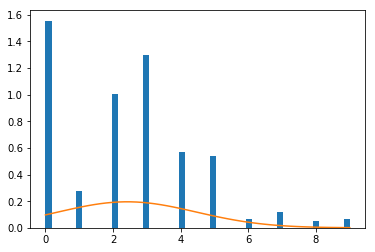

In [186]:
n, bins, patches = plt.hist(array, 50, normed=1)
mu = np.mean(array)
sigma = np.std(array)
plt.plot(bins, mlab.normpdf(bins, mu, sigma))
plt.show()

## splitting data into test and train

In [138]:
train, test = train_test_split(df_num, test_size=0.2)

In [140]:
train.shape

(800, 21)

In [141]:
test.shape

(200, 21)

In [142]:
test

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,property_magnitude,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
740,1,24,1,3,2325,1,2,2,1,2,...,0,32,0,0,1,2,1,1,0,1
959,2,24,2,2,3069,1,3,4,1,2,...,3,30,2,2,1,2,1,1,0,1
107,2,12,2,3,6078,0,2,2,1,2,...,0,32,2,0,1,2,1,1,0,1
5,0,36,2,1,9055,4,1,2,1,2,...,3,35,2,2,1,1,2,0,0,1
39,2,9,2,0,458,0,1,4,1,2,...,2,24,2,0,1,2,1,1,0,1
799,2,9,2,3,1549,4,0,4,1,2,...,2,35,2,0,1,0,1,1,0,1
509,0,39,2,4,8588,1,3,4,1,2,...,0,45,2,0,1,3,1,0,0,1
637,0,60,3,0,15653,0,2,2,1,2,...,0,21,2,0,2,2,1,0,0,1
236,2,6,2,3,14555,4,4,1,1,2,...,1,23,2,0,1,0,1,0,0,0
60,2,9,2,5,1391,0,1,2,2,2,...,2,27,0,0,1,2,1,0,0,1


In [144]:
test.columns

Index(['over_draft', 'credit_usage', 'credit_history', 'purpose',
       'current_balance', 'Average_Credit_Balance', 'employment', 'location',
       'personal_status', 'other_parties', 'residence_since',
       'property_magnitude', 'cc_age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [145]:
cols = ['over_draft', 'credit_usage', 'credit_history', 'purpose',
       'current_balance', 'Average_Credit_Balance', 'employment', 'location',
       'personal_status', 'other_parties', 'residence_since',
       'property_magnitude', 'cc_age', 'other_payment_plans', 'housing',
       'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker']

In [146]:
colsRes = ['class']

In [147]:
trainArr = train.as_matrix(cols) #training array

In [148]:
trainRes = train.as_matrix(colsRes) # training results

## random forest

In [149]:
rf = RandomForestClassifier(n_estimators=1000) # initialize

In [150]:
rf.fit(trainArr, trainRes) # fit the data to the algorithm

/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [151]:
testArr = test.as_matrix(cols)

In [152]:
results = rf.predict(testArr)

## importance

In [159]:
importances = rf.feature_importances_

In [167]:
print(importances)

[ 0.11470359  0.10169254  0.05984879  0.06027407  0.14004565  0.0476706
  0.05195774  0.04074017  0.03642469  0.0185023   0.04261888  0.03849674
  0.10154977  0.03115413  0.02304417  0.02248327  0.03065116  0.01302498
  0.02017273  0.00494404]


In [160]:
indices = np.argsort(importances)

In [162]:
features = test.columns

## plot the graph for importance

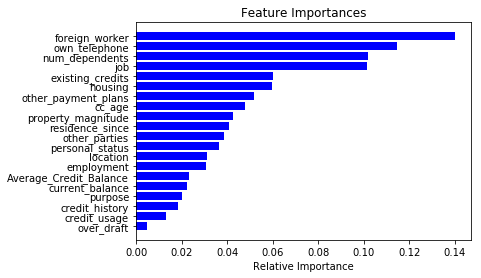

In [170]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features) ## removed [indices]
plt.xlabel('Relative Importance')
plt.show()

## result of prediction as new column in test df

In [153]:
test['predictions'] = results

/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [154]:
test

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,cc_age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,predictions
740,1,24,1,3,2325,1,2,2,1,2,...,32,0,0,1,2,1,1,0,1,0
959,2,24,2,2,3069,1,3,4,1,2,...,30,2,2,1,2,1,1,0,1,1
107,2,12,2,3,6078,0,2,2,1,2,...,32,2,0,1,2,1,1,0,1,1
5,0,36,2,1,9055,4,1,2,1,2,...,35,2,2,1,1,2,0,0,1,1
39,2,9,2,0,458,0,1,4,1,2,...,24,2,0,1,2,1,1,0,1,1
799,2,9,2,3,1549,4,0,4,1,2,...,35,2,0,1,0,1,1,0,1,1
509,0,39,2,4,8588,1,3,4,1,2,...,45,2,0,1,3,1,0,0,1,1
637,0,60,3,0,15653,0,2,2,1,2,...,21,2,0,2,2,1,0,0,1,0
236,2,6,2,3,14555,4,4,1,1,2,...,23,2,0,1,0,1,0,0,0,1
60,2,9,2,5,1391,0,1,2,2,2,...,27,0,0,1,2,1,0,0,1,1


In [155]:
test['diff'] = test['class'] - test['predictions']

/Users/admin/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## diffs

In [157]:
test[test['diff'] != 0]

,over_draft,credit_usage,credit_history,purpose,current_balance,Average_Credit_Balance,employment,location,personal_status,other_parties,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,predictions,diff
740,1,24,1,3,2325,1,2,2,1,2,...,0,0,1,2,1,1,0,1,0,1
637,0,60,3,0,15653,0,2,2,1,2,...,2,0,2,2,1,0,0,1,0,1
236,2,6,2,3,14555,4,4,1,1,2,...,2,0,1,0,1,0,0,0,1,-1
304,0,48,4,3,10127,2,1,2,1,2,...,0,2,1,2,1,1,0,0,1,-1
4,1,24,3,3,4870,0,1,3,1,2,...,2,2,2,2,2,1,0,0,1,-1
633,0,9,2,2,1980,0,0,2,0,1,...,2,1,2,2,1,1,0,0,1,-1
624,1,18,2,0,2600,0,1,4,1,2,...,2,2,2,2,1,1,0,0,1,-1
435,2,12,2,0,1484,4,1,2,2,2,...,2,0,1,2,1,0,0,0,1,-1
337,1,15,2,6,1275,4,1,4,0,2,...,2,1,1,2,1,1,0,0,1,-1
155,1,12,2,2,1282,0,1,2,0,2,...,2,1,1,2,1,1,0,0,1,-1
